## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [1]:
# 1. Import modules
import numpy as np 
from skimage.color import rgb2gray
import imageio
import matplotlib.pyplot as plt

%matplotlib inline

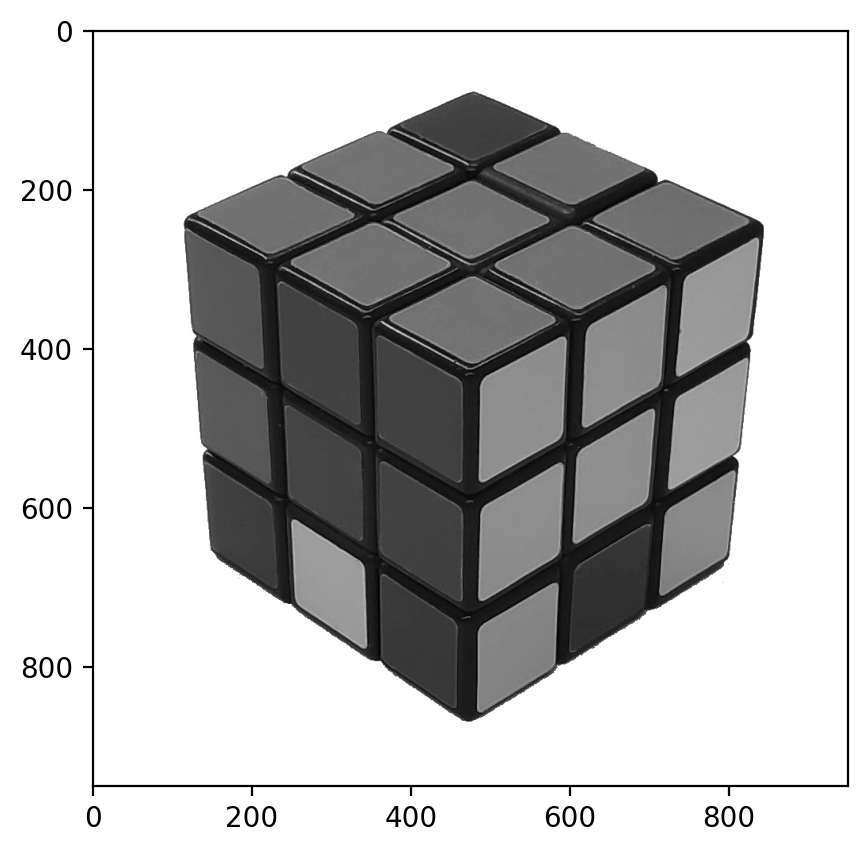

In [2]:
# 2. Load and visualize image
cube = imageio.imread('images/cube.jpg')
cube_gray_uint8 = np.uint8(rgb2gray(cube) * 255)

plt.figure(figsize=(5, 5), dpi=200)
plt.imshow(cube_gray_uint8, cmap='gray')

In [3]:
# Print out the minimum and maximum value of the displayed image as well as its data type
print(np.amin(cube_gray_uint8))
print(np.amax(cube_gray_uint8))
print(cube_gray_uint8.dtype)

0
255
uint8


In [4]:
# 3. Define your function called histogram(image) here:
# Not use the build-in function
def histogram(image):
    """
    image: gray scale image 
    """
    bins = np.zeros(256, dtype=np.int)
    for x in image: 
        for y in x: 
            bins[y] += 1
    return bins

In [5]:
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram(hist):
    """
    Compute cumulative histogram given the his
    """
    H = np.zeros_like(hist)
    for i in range(len(hist)):
        H[i] = np.sum(hist[:i + 1])
    return H

In [6]:
# 5. Compute the histogram and cumulative Histogram
h = histogram(cube_gray_uint8)
H = cumulativeHistogram(h)
N = np.sum(h)

<BarContainer object of 256 artists>

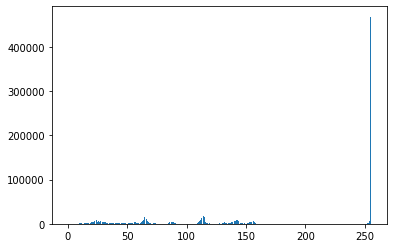

In [7]:
# Display them
# For histogram, use plt.bar()
x = np.arange(0, 256)
plt.bar(x, h)

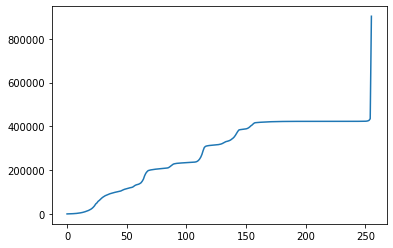

In [8]:
# For Cumulative histogram, use plt.plot()
plt.plot(x, H)

In [ ]:
# TODO: Add label to each image same as the Cryrill Video 


## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

In [18]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image):
    """
    image: currently grayscale image
    monotonous function f such as b = f(a): a 1-D array where index is value at a, and value at that index is new value at b
    """
    h = histogram(image)
    H = cumulativeHistogram(h)
    N = np.sum(h)
    
    a = np.arange(0, 256)
    f = np.rint(255 * (H[a] - H[0]) / (N - H[0]))
    
    r, c = image.shape
    new_im = np.zeros_like(image)
    for i in range(r):
        for j in range(c):
            new_im[i, j] = f[image[i, j]]

    return new_im

In [19]:
# 2. Compute equalized image
equalized_cube_gray_uint8 = imageEqualization(cube_gray_uint8)

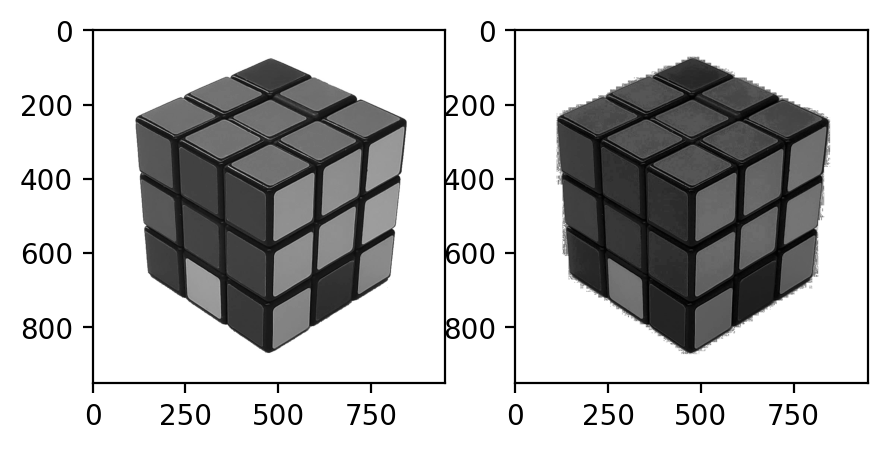

In [20]:
# 3. Visualized both of them
plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(1,2,1)
plt.imshow(cube_gray_uint8, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(equalized_cube_gray_uint8, cmap="gray")

**2. Explain your observations here:**

*Your Answer*

In [21]:
# 3. Compute the histogram and cumulative histogram of the equalized image
h_equalized = histogram(equalized_cube_gray_uint8)
H_equalized = cumulativeHistogram(h_equalized)

<BarContainer object of 256 artists>

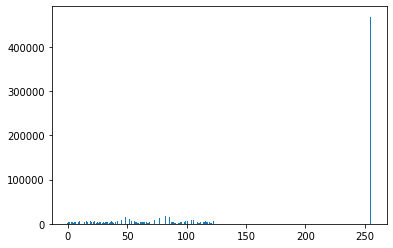

In [22]:
# Plot 
plt.bar(x, h_equalized)

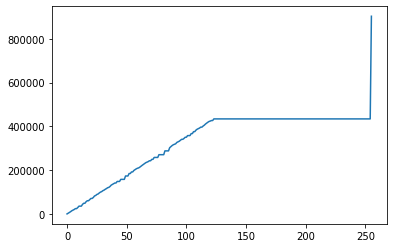

In [23]:
plt.plot(x, H_equalized)

**3. Explain your observations here:**

*Your Answer* 